# Calculating monthly averages and other summaries using events 

Begin by importing all python modules we will need.

In [1]:
# A 'magic' command that displays plots inline inside the notebook as static images
%matplotlib inline
import requests 
import numpy as np
import pandas as pd
from datetime import datetime

Defining some functions and values that we use later in the code. 

### You can get data for a point or an area of your interest

If you are requesting data for a point or polygon use the `g` parameter to specify geometry. Geometry can be written in various formats including WKT, GeoJSON, KML. The examples below use WKT (Well Known Text) format.

### If you want to use polygon geometry from Cal-Adapt API, it's a 2-step process

- First get a polygon from a boundary layer in the API (e.g. counties, census tracts, place, etc.) that intersects your point of interest. Find the id of the polygon.
- Then use the `ref` param instead of the `g` param to request data

[Complete list of boundaries in Cal-Adapt API](https://berkeley-gif.github.io/caladapt-docs/data-catalog.html#vector-data). **Note: Requests might time out if the polygon is too large**. Subsetting the daily data has been tested with counties, census tracts, places and hydrounits. If you need data for a large boundary we reccomend downloading the daily rasters and processing the data locally. 

In [2]:
# Your point of interest
point = 'POINT(-121.4687 38.5938)'
# Name of boundary layer in API
resource = 'counties'
# Request url
url = 'http://api.cal-adapt.org/api/' +  resource + '/?intersects=' +  point
response = requests.get(url)
county = response.json()
county = county['features'][0]
id  = county['id']
id

34

## 1. To Get daily data

For this example we will get modeled projections for one scenario (RCP 8.5) and one model (HadGEM2-ES) for a county boundary in the Cal-Adapt API (see `params` in the previous code block).

In [3]:
# Request url
url = 'https://api.cal-adapt.org/api/series/tasmax_day_HadGEM2-ES_rcp85/events/?ref=/api/counties/%s/&imperial=TRUE&stat=mean' % id

# Make request
response = requests.get(url)
# Variable stores modeled daily data in a Pandas dataframe
if response.ok:
    data = response.json()
    df = pd.DataFrame(data['data'], data['index'])
    df.index.name = 'Date/Time'
    df.index = pd.to_datetime(df.index)
else:
    print("failed to downlaod")


In [4]:
df.head()

,0
Date/Time,
2006-01-01 00:00:00+00:00,54.150963
2006-01-02 00:00:00+00:00,51.575603
2006-01-03 00:00:00+00:00,51.505348
2006-01-04 00:00:00+00:00,52.059608
2006-01-05 00:00:00+00:00,45.560204


### 2. To get annual/monthly Aggregated Data

In [5]:
# Request url
# Set freq = A for annual aggregate data
# Set freq = M for monthly aggregated data
# To know more about other modeling freq, go to this link: http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
url = 'http://api.cal-adapt.org/api/series/tasmax_day_HadGEM2-ES_rcp85/events/?ref=/api/counties/%s/&imperial=TRUE&freq=A&stat=mean' % id

# Make request
response = requests.get(url)
# Variable stores modeled daily data in a Pandas dataframe
df = None

if response.ok:
    data = response.json()
    df =  pd.DataFrame(data['data'], data['index'])
    df.index.name = 'Date/Time'
    df.columns = data['columns']
    df.index = pd.to_datetime(df.index)
print(df.head())
    

                                 min       mean         max        std  count
Date/Time                                                                    
2006-12-31 00:00:00+00:00  42.374115  74.931122  105.379555  14.631419    365
2007-12-31 00:00:00+00:00  37.334301  78.054161  106.847488  16.656578    365
2008-12-31 00:00:00+00:00  43.799538  75.509369  106.747902  14.642742    366
2009-12-31 00:00:00+00:00  45.302742  75.518150  115.727463  16.306816    365
2010-12-31 00:00:00+00:00  42.101379  74.212555  103.033859  15.212212    365


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


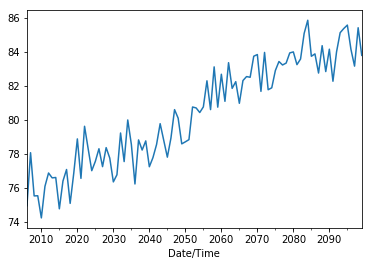

In [6]:
df['mean'].plot()

### 2. To get monthly Aggregated Data

In [8]:
# Request url
url = 'http://api.cal-adapt.org/api/series/tasmax_day_HadGEM2-ES_rcp85/events/?ref=/api/counties/%s/&imperial=TRUE&freq=M&stat=mean' % id

# Make request
response = requests.get(url)

# Variable stores modeled daily data in a Pandas dataframe
df = None

if response.ok:
    data = response.json()
    df =  pd.DataFrame(data['data'], data['index'])
    df.index.name = 'Date/Time'
    df.columns = data['columns']
    df.index = pd.to_datetime(df.index)
    print(df.head())

                                 min       mean        max       std  count
Date/Time                                                                  
2006-01-31 00:00:00+00:00  44.784294  55.927528  64.810394  4.849804     31
2006-02-28 00:00:00+00:00  59.350960  64.960373  74.869095  3.680691     28
2006-03-31 00:00:00+00:00  53.036453  67.032394  78.162132  6.827471     31
2006-04-30 00:00:00+00:00  63.179913  77.658928  89.716507  7.095167     30
2006-05-31 00:00:00+00:00  63.347565  79.353065  96.151863  8.818030     31


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


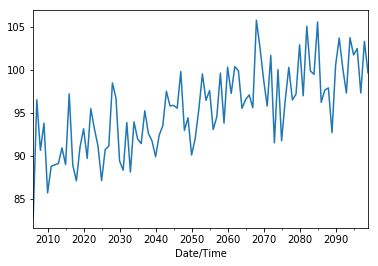

In [9]:
jun_avg = df['mean'][df.index.month == 6]
jun_avg.plot()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


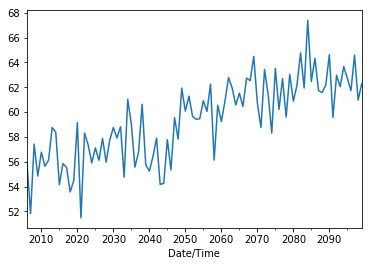

In [10]:
jan_avg = df['mean'][df.index.month == 1]
jan_avg.plot()

### 4. Export dataframe to csv file

In [11]:
df.to_csv('df.csv')